In [1]:
import gdown

In [2]:
file_links=["1Oy1fJhk6J6Oxj39sNBQjIeL53G2bn2yP","1Z361kDgw-OjtC35b5dpZu5kjp9tWFq8s","1BDPBr55VYLrKTfI5LQQlcJs4RuBDViXE"]

In [21]:
url_head='https://drive.google.com/uc?id='

dwn_url=url_head+file_links[0]

file_='training_0.csv.zip'

gdown.download(dwn_url,file_, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Oy1fJhk6J6Oxj39sNBQjIeL53G2bn2yP
From (redirected): https://drive.google.com/uc?id=1Oy1fJhk6J6Oxj39sNBQjIeL53G2bn2yP&confirm=t&uuid=42018092-7983-496a-9878-eaeee38ca4da
To: /content/training_0.csv.zip
100%|██████████| 206M/206M [00:15<00:00, 13.1MB/s]


'training_0.csv.zip'

In [9]:
dwn_url=url_head+file_links[1]

file_='training_1.csv.zip'

gdown.download(dwn_url,file_, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Z361kDgw-OjtC35b5dpZu5kjp9tWFq8s
From (redirected): https://drive.google.com/uc?id=1Z361kDgw-OjtC35b5dpZu5kjp9tWFq8s&confirm=t&uuid=33c783db-bfef-46b1-a8fe-f2190cd3efcb
To: /content/training_1.csv.zip
100%|██████████| 206M/206M [00:04<00:00, 46.5MB/s]


'training_1.csv.zip'

In [3]:
# memory control
import gc
gc.collect()


30

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load data and concatenate
import pandas as pd


In [6]:
# load data and concatenate
df1=pd.read_csv('training_0.csv.zip')
df2=pd.read_csv('training_1.csv.zip')


In [9]:
# dowanload and upload
target = '飆股'

df_test=pd.read_csv("http://120.126.22.75/tbrain/public_x.csv.zip")

In [10]:
df_test[target]=0

In [11]:
gc.collect()

0

In [13]:
chunk=pd.concat([df1, df2,df_test], ignore_index=True)

In [14]:
df_size=len(df1)+len(df2)
df_test_size=len(df_test)
print(f"the size of training data is {df_size}")
print(f"the size of test data is {df_test_size}")

the size of training data is 20000
the size of test data is 25108


In [15]:
!rm *.zip

In [16]:
del df1,df2,df_test

In [19]:
gc.collect()

0

In [18]:
# deletet taget column
y= chunk[target]
chunk= chunk.drop(columns=['ID',target])

In [21]:
chunk.tail(2)

,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),外資券商_前1天分點出貨比(%),...,上市加權指數前14天成交量,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度
45106,1.0892,0.6864,0.8777,0.8795,1.2398,1.4488,1.1701,1.2118,1.2927,1.0332,...,1.0392,1.366,1.2182,1.3742,1.0321,1.3339,1.9648,0.8373,0.9554,0.7367
45107,1.7024,1.8501,2.0542,2.0776,1.2043,1.7094,1.3355,1.3530,3.3559,1.6726,...,0.7036,0.527,0.5794,0.8554,0.5284,0.6196,0.8223,1.0335,0.7708,0.5969


In [22]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45108 entries, 0 to 45107
Columns: 10212 entries, 外資券商_分點進出 to 上市加權指數20天成交量波動度
dtypes: float64(10212)
memory usage: 3.4 GB


In [23]:
def bin_feature_qcut(x, n_bins=100):
    try:
        return pd.qcut(x, q=n_bins, labels=False, duplicates="drop")
    except:
        return pd.Series(np.nan, index=x.index)

In [24]:
for col_ in chunk.columns:
    chunk[col_]=bin_feature_qcut(chunk[col_])

In [25]:
gc.collect()

312

In [26]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45108 entries, 0 to 45107
Columns: 10212 entries, 外資券商_分點進出 to 上市加權指數20天成交量波動度
dtypes: float64(9951), int64(261)
memory usage: 3.4 GB


In [27]:
chunk.tail()

,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),外資券商_前1天分點出貨比(%),...,上市加權指數前14天成交量,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度
45103,31,NaN,35.0,0.0,0.0,30,46.0,35.0,0.0,6.0,...,86,86,84,86,78,82,84,57,40,65
45104,53,42.0,40.0,59.0,59.0,1,48.0,42.0,57.0,64.0,...,89,87,89,80,83,85,83,81,74,80
45105,19,0.0,12.0,0.0,38.0,13,22.0,17.0,0.0,46.0,...,30,39,32,32,38,50,62,16,0,5
45106,8,22.0,22.0,18.0,32.0,59,37.0,28.0,32.0,25.0,...,53,61,60,62,49,63,76,36,46,33
45107,60,60.0,58.0,48.0,31.0,61,69.0,64.0,58.0,43.0,...,35,23,24,45,26,27,38,44,34,21


In [ ]:
# convert float64 to float 16, int64 to int8
for col in chunk.columns:
    if chunk[col].dtype == 'float64':
      chunk[col] = chunk[col].astype('float')
for col in chunk.columns:
    if chunk[col].dtype == 'int64':
      chunk[col] = chunk[col].astype('int8')

In [29]:
# fillna
chunk=chunk.fillna(-1)

In [30]:
for col in chunk.columns:
    chunk[col] = chunk[col].astype('int8')

In [32]:
gc.collect()

44

In [33]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45108 entries, 0 to 45107
Columns: 10212 entries, 外資券商_分點進出 to 上市加權指數20天成交量波動度
dtypes: int8(10212)
memory usage: 439.3 MB


In [34]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [38]:
X_train = chunk.iloc[:df_size].copy()
X_test = chunk.iloc[df_size:].copy()
y_train = y[:df_size].copy()
y_test=y[df_size:].copy()

In [39]:
sum(y_test)

0

In [40]:
gc.collect()

2957

In [41]:
del chunk

In [42]:
# --- Step 2: Train CV RandomForest ---
def train_cv_rf(X, y, X_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(X))
    preds = np.zeros(len(X_test))
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):

        #X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
        #X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        #sampler = ImbPipeline([
        #    ("over", SMOTE(sampling_strategy=0.1, random_state=42)),
        #    ("under", RandomUnderSampler(sampling_strategy=0.5, random_state=42))
        #])
        #X_res, y_res = sampler.fit_resample(X_tr, y_tr)

        model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)


        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        #model = RandomForestClassifier(n_estimators=100, class_weight=None, random_state=42)
        #model.fit(X_res, y_res)
        prob = model.predict_proba(X.iloc[val_idx])[:, 1]
        oof[val_idx] = prob
        preds += model.predict_proba(X_test)[:, 1] / skf.n_splits
        pred_label = (prob > 0.2).astype(int)
        #prob = model.predict_proba(X_val)[:, 1]
        #oof[val_idx] = prob
        #preds += model.predict_proba(X_test)[:, 1] / skf.n_splits
        #pred_label = (prob > 0.2).astype(int)
        print(f"[RF Fold {fold}] AUC: {roc_auc_score(y.iloc[val_idx], prob):.4f}, F1: {f1_score(y.iloc[val_idx], pred_label):.4f}, Acc: {accuracy_score(y.iloc[val_idx], pred_label):.4f}")
        #print(f"[RF Fold {fold}] AUC: {roc_auc_sore(y_val, prob):.4f}, F1: {f1_score(y_val, pred_label):.4f}, Acc: {accuracy_score(y_val, pred_label):.4f}")
    return oof, preds,model

In [43]:
oof_rf, pred_rf, model_rf = train_cv_rf(X_train, y_train, X_test)

[RF Fold 0] AUC: 0.8739, F1: 0.0000, Acc: 0.9910
[RF Fold 1] AUC: 0.8998, F1: 0.0606, Acc: 0.9922
[RF Fold 2] AUC: 0.8358, F1: 0.0909, Acc: 0.9900
[RF Fold 3] AUC: 0.9011, F1: 0.1304, Acc: 0.9900
[RF Fold 4] AUC: 0.9303, F1: 0.0571, Acc: 0.9918


In [44]:
!pip install -q git+https://github.com/cchuang2009/tw_matplotlib.git
import tw_matplotlib

  Preparing metadata (setup.py) ... done


In [45]:
gc.collect()

425

In [46]:
import matplotlib.pyplot as plt


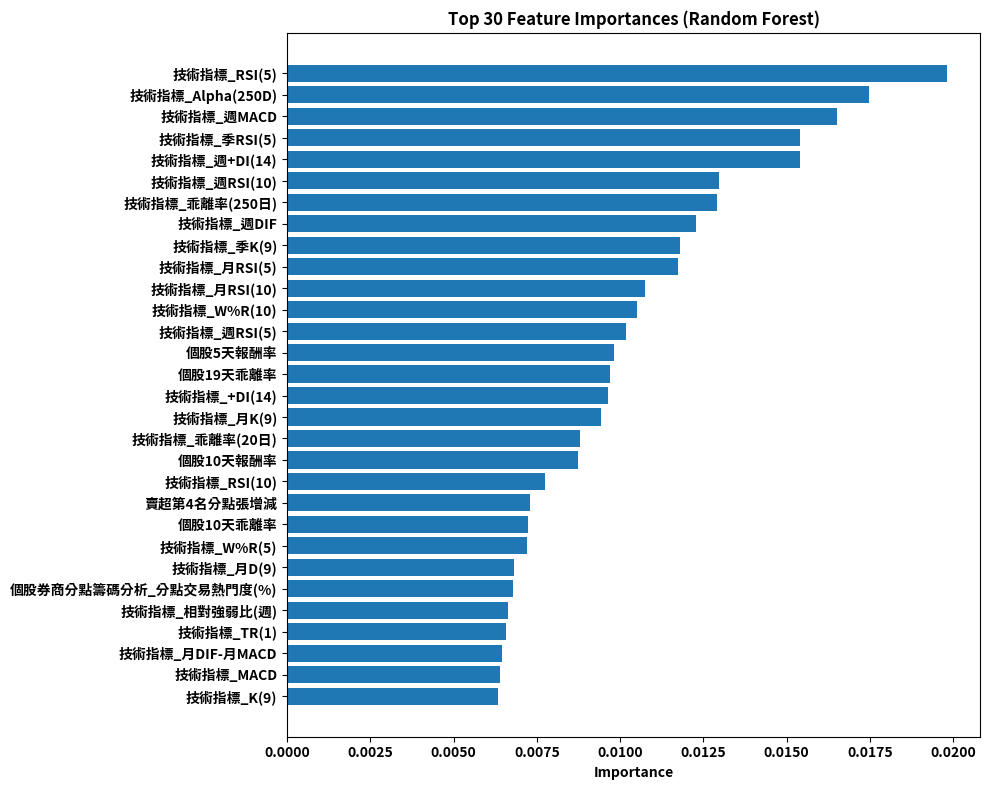

In [47]:
# Assuming model_rf is trained and you have feature names
importances = model_rf.feature_importances_
features = X_train.columns

# Sort and plot
importance_df = pd.DataFrame({"feature": features, "importance": importances})
importance_df = importance_df.sort_values(by="importance", ascending=False).head(30)

plt.figure(figsize=(10, 8))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.title("Top 30 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

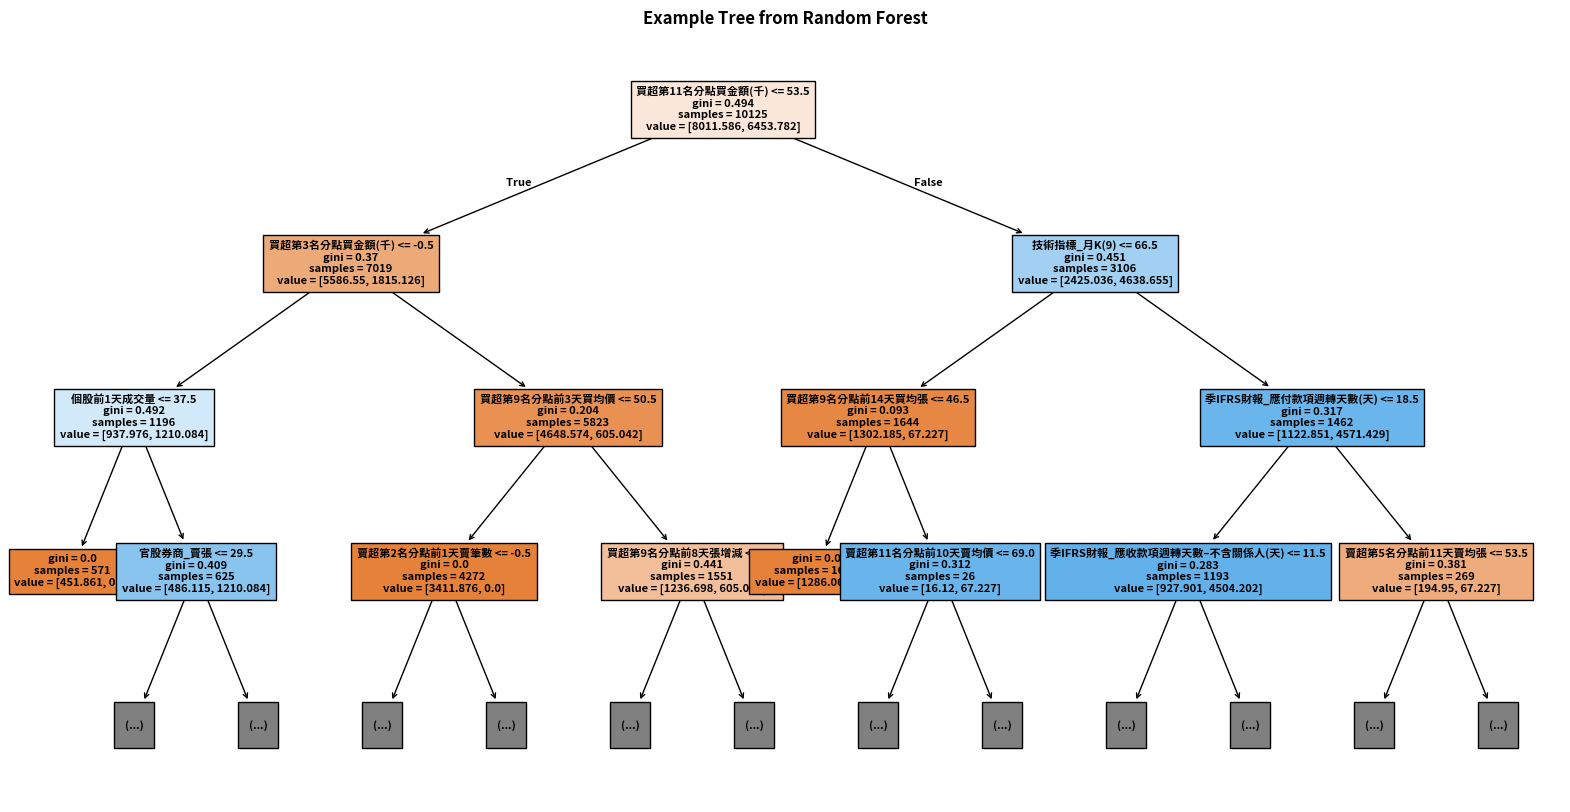

In [48]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model_rf.estimators_[0],
          feature_names=X_train.columns.tolist(),
          filled=True,
          max_depth=3,
          fontsize=8)
plt.title("Example Tree from Random Forest")
plt.show()

In [49]:
# --- Step 2: Train CV RandomForest with SMOTE + Undersampling ---
def train_cv_rf_undersampling(X, y, X_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(X))
    preds = np.zeros(len(X_test))
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        sampler = ImbPipeline([
            ("over", SMOTE(sampling_strategy=0.1, random_state=42)),
            ("under", RandomUnderSampler(sampling_strategy=0.5, random_state=42))
        ])
        X_res, y_res = sampler.fit_resample(X_tr, y_tr)

        model = RandomForestClassifier(n_estimators=100, class_weight=None, random_state=42)
        model.fit(X_res, y_res)
        prob = model.predict_proba(X_val)[:, 1]
        oof[val_idx] = prob
        preds += model.predict_proba(X_test)[:, 1] / skf.n_splits
        pred_label = (prob > 0.2).astype(int)
        print(f"[RF Fold {fold}] AUC: {roc_auc_score(y_val, prob):.4f}, F1: {f1_score(y_val, pred_label):.4f}, Acc: {accuracy_score(y_val, pred_label):.4f}")
    return oof, preds,model

In [50]:
oof_rf_undersampling, pred_rf_undersampling, model_rf_undersampling = train_cv_rf_undersampling(X_train, y_train, X_test)

[RF Fold 0] AUC: 0.9360, F1: 0.1190, Acc: 0.9223
[RF Fold 1] AUC: 0.9575, F1: 0.1466, Acc: 0.9273
[RF Fold 2] AUC: 0.9146, F1: 0.1149, Acc: 0.9153
[RF Fold 3] AUC: 0.9425, F1: 0.1240, Acc: 0.9153
[RF Fold 4] AUC: 0.9396, F1: 0.1412, Acc: 0.9270


In [54]:
# definition of viz model tree
def tree_viz(model_,cols):
    plt.figure(figsize=(20, 10))
    plot_tree(model_.estimators_[0],
          feature_names=cols.tolist(),
          filled=True,
          max_depth=3,
          fontsize=8)
    plt.title("Example Tree from Random Forest")

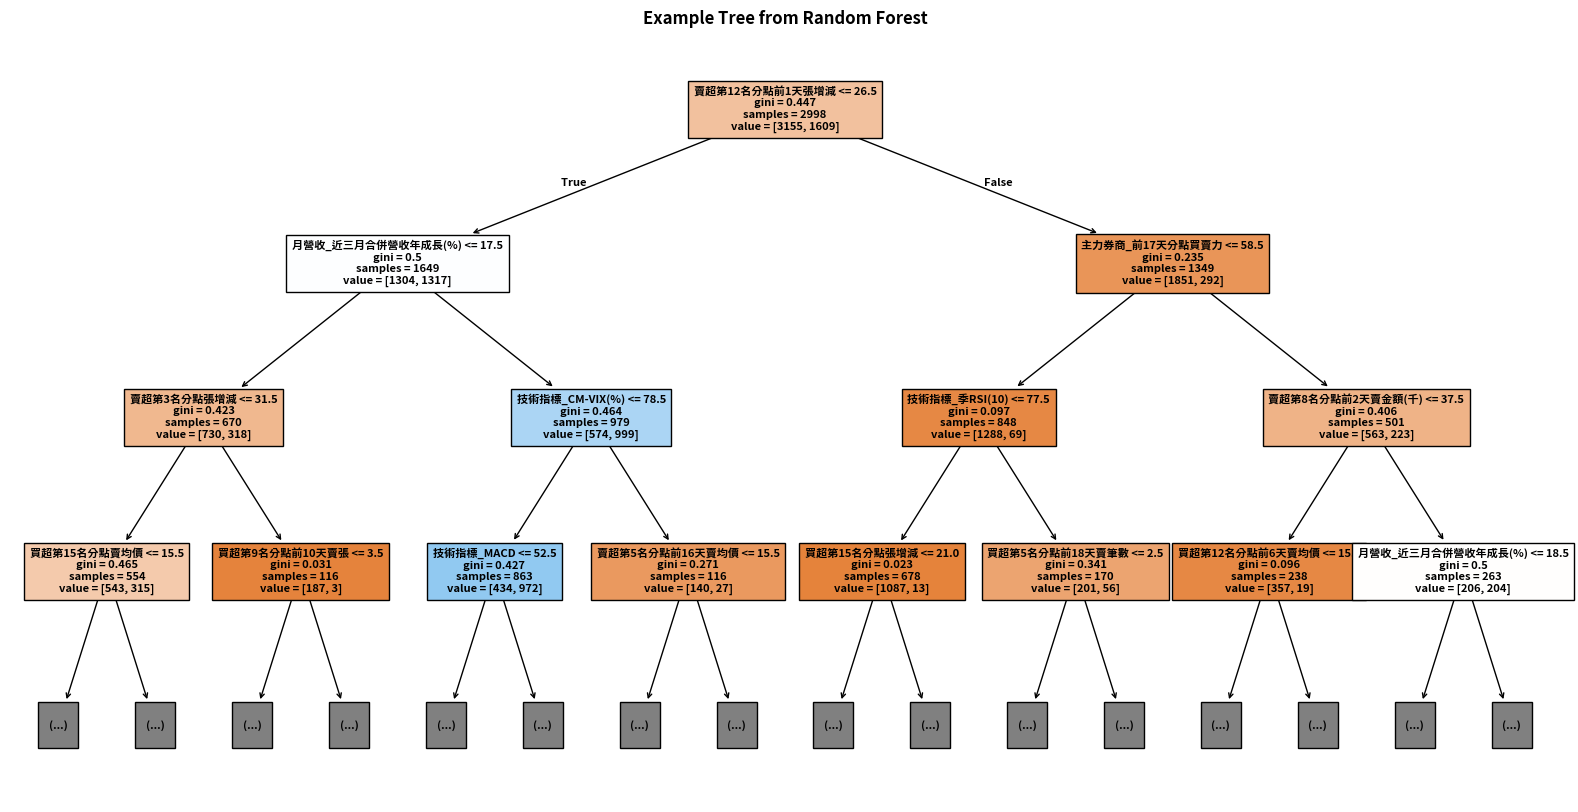

In [55]:
tree_viz(model_rf_undersampling,X_train.columns)

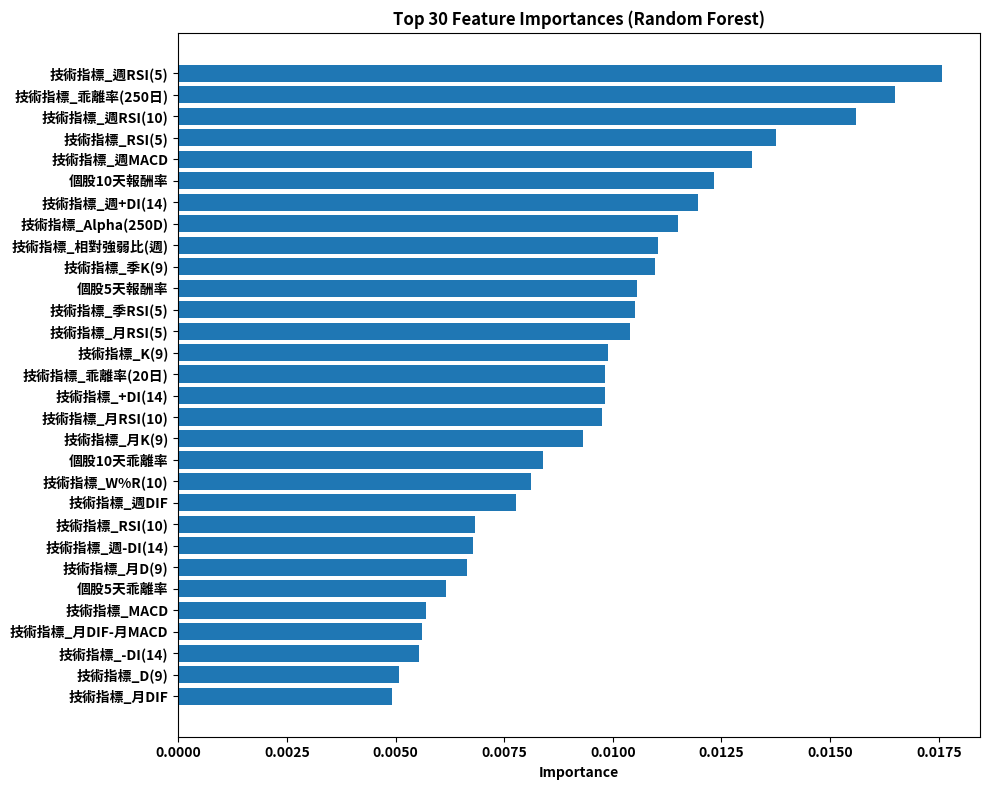

In [56]:
# Assuming model_rf is trained and you have feature names
importances = model_rf_undersampling.feature_importances_
features = X_train.columns


# Sort and plot
importance_df = pd.DataFrame({"feature": features, "importance": importances})
importance_df = importance_df.sort_values(by="importance", ascending=False).head(30)

plt.figure(figsize=(10, 8))
plt.barh(importance_df["feature"], importance_df["importance"])
plt.title("Top 30 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()


In [57]:
# --- Step 4: Train CV lightgbm with SMOTE + Undersampling (before scaling) ---
def train_cv_lgbm_undersampling(X, y, X_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(X))
    preds = np.zeros(len(X_test))
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_tr, y_tr = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

        sampler = ImbPipeline([
            ("over", SMOTE(sampling_strategy=0.1, random_state=42)),
            ("under", RandomUnderSampler(sampling_strategy=0.5, random_state=42))
        ])
        X_res, y_res = sampler.fit_resample(X_tr, y_tr)

        model = LGBMClassifier(n_estimators=500, learning_rate=0.05, class_weight=None
                                , random_state=42)
        model.fit(X_res, y_res)
        prob = model.predict_proba(X_val)[:, 1]
        oof[val_idx] = prob
        preds += model.predict_proba(X_test)[:, 1] / skf.n_splits
        pred_label = (prob > 0.2).astype(int)
        print(f"[LGBM Fold {fold}] AUC: {roc_auc_score(y_val, prob):.4f}, F1: {f1_score(y_val, pred_label):.4f}, Acc: {accuracy_score(y_val, pred_label):.4f}")
    return oof, preds,model

In [ ]:
oof_rf_undersampling, pred_rf_undersampling, model_rf_undersampling = train_cv_lgbm_undersampling(X_train, y_train, X_test)